In [67]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [68]:
G=nx.DiGraph()

In [69]:
nodes={
    "A": {'features': {"T": 1.0, "F": 0.0, "I": 0.0}},
    "B": {"features": {"T": 0.5, "F": 0.3, "I": 0.2}},
    "C": {"features": {"T": 0.8, "F": 0.1, "I": 0.1}},
    "D": {"features": {"T": 0.7, "F": 0.2, "I": 0.1}},
    "E": {"features": {"T": 0.9, "F": 0.1, "I": 0.0}},
    "F": {"features": {"T": 0.6, "F": 0.1, "I": 0.3}},
    "G": {"features": {"T": 0.3, "F": 0.5, "I": 0.2}},
    "H": {"features": {"T": 0.4, "F": 0.4, "I": 0.2}},
    "I": {"features": {"T": 0.2, "F": 0.6, "I": 0.2}},
    "J": {"features": {"T": 0.3, "F": 0.3, "I": 0.4}},
    
}

In [70]:
edges={
    ("A","B"):  {'T': 0.4,'I': 0.0,'F':0.0},
    ("B", "C"): {"T": 0.3, "I": 0.1, "F": 0.1},
    ("C", "D"): {"T": 0.5, "I": 0.1, "F": 0.1},
    ("D", "E"): {"T": 0.6, "I": 0.1, "F": 0.0},
    ("E", "F"): {"T": 0.5, "I": 0.1, "F": 0.0},
    ("F", "G"): {"T": 0.2, "I": 0.2, "F": 0.1},
    ("G", "H"): {"T": 0.3, "I": 0.1, "F": 0.1},
    ("H", "I"): {"T": 0.4, "I": 0.2, "F": 0.0},
    ("I", "J"): {"T": 0.3, "I": 0.3, "F": 0.1},
}

In [71]:
# nodes.get('name') #nodes['name']

In [72]:
# for i in nodes:
#     print(i)

In [73]:
# for i in nodes.values():
#     print(i)

In [74]:
# for  j in nodes.items():
#     print(j)

In [75]:
# nodes.items()

A {'T': 1.0, 'F': 0.0, 'I': 0.0}
B {'T': 0.5, 'F': 0.3, 'I': 0.2}
C {'T': 0.8, 'F': 0.1, 'I': 0.1}
D {'T': 0.7, 'F': 0.2, 'I': 0.1}
E {'T': 0.9, 'F': 0.1, 'I': 0.0}
F {'T': 0.6, 'F': 0.1, 'I': 0.3}
G {'T': 0.3, 'F': 0.5, 'I': 0.2}
H {'T': 0.4, 'F': 0.4, 'I': 0.2}
I {'T': 0.2, 'F': 0.6, 'I': 0.2}
J {'T': 0.3, 'F': 0.3, 'I': 0.4}


<function IPython.core.display_functions.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, raw=False, clear=False, **kwargs)>

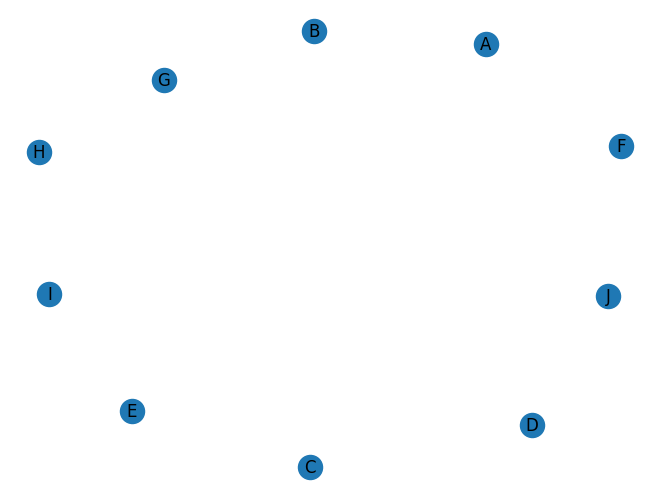

In [76]:
for node, value in nodes.items():
    G.add_node(node,features=value['features'])
    print(node,value['features'])
dispay=nx.draw(G,with_labels=True)
display

('A', 'B') {'T': 0.4, 'I': 0.0, 'F': 0.0}
('B', 'C') {'T': 0.3, 'I': 0.1, 'F': 0.1}
('C', 'D') {'T': 0.5, 'I': 0.1, 'F': 0.1}
('D', 'E') {'T': 0.6, 'I': 0.1, 'F': 0.0}
('E', 'F') {'T': 0.5, 'I': 0.1, 'F': 0.0}
('F', 'G') {'T': 0.2, 'I': 0.2, 'F': 0.1}
('G', 'H') {'T': 0.3, 'I': 0.1, 'F': 0.1}
('H', 'I') {'T': 0.4, 'I': 0.2, 'F': 0.0}
('I', 'J') {'T': 0.3, 'I': 0.3, 'F': 0.1}


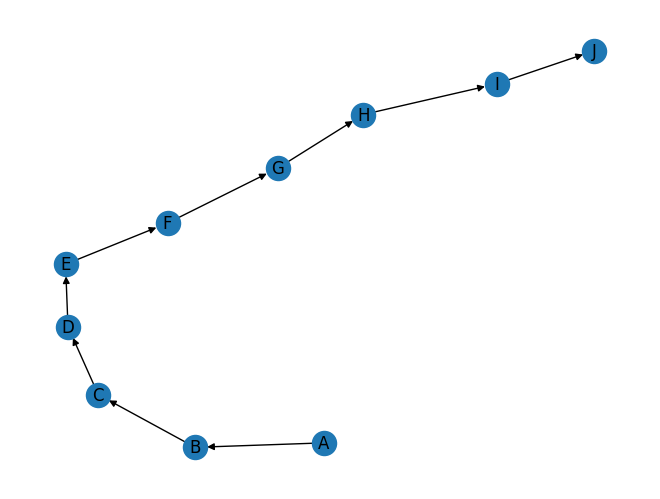

In [77]:
for edge, val in edges.items():
    G.add_edge(edge[0],edge[1],**val)
    print(edge,val)
nx.draw(G,with_labels=True)

In [78]:
for node in G.nodes:
    neighbours=list(G.predecessors(node))
    print(f'the neighbours of {node} is {neighbours}')

the neighbours of A is []
the neighbours of B is ['A']
the neighbours of C is ['B']
the neighbours of D is ['C']
the neighbours of E is ['D']
the neighbours of F is ['E']
the neighbours of G is ['F']
the neighbours of H is ['G']
the neighbours of I is ['H']
the neighbours of J is ['I']


In [79]:
def update_T(node, neighbours,W_T=1.0):
    T_sum=sum(G[neighbour][node]['T'] for neighbour in neighbours)
    T_i=G.nodes[node]['features']['T']
    return 1/ (1+np.exp(-(W_T * T_i + T_sum)))

In [80]:
def update_F(node,neighbours,W_F=1.0):
    F_sum=sum([G[neighbour][node]["F"] for neighbour in neighbours])
    F_i=G.nodes[node]['features']['F']
    return 1/(1+np.exp(-(W_F*F_i+ F_sum)))

In [81]:
def update_I(node,neighgbours,W_I=1.0):
    I_sum=sum([G[neighbour][node]['I'] for neighbour in neighbours])
    I_i=G.nodes[node]['features']['I']
    return 1/(1+np.exp(-(W_I*I_i+ I_sum)))

In [82]:
print(np.exp(2))

7.38905609893065


In [95]:
epsilon=1e-4

def message_passing_and_update_with_convergece(G,max_iterations=100,epsilon=1e-4):
    for iteration in range(max_iterations):
        converged=True
update_features={}

In [96]:
old_T=G.nodes[node]['features']['T']
old_F=G.nodes[node]['features']["F"]
old_I=G.nodes[node]['features']["I"]

In [97]:
new_T=update_T(node,neighbours)
new_F=update_F(node,neighbours)
new_I=update_I(node,neighbours)

In [98]:

update_features[node]={
    'T':new_T,
    "F":new_F,
    "I":new_I
}

In [99]:
# x=3
# y=4
# print(np.linalg.norm([x,y]))

In [100]:
delta=np.linalg.norm([new_T-old_T,new_F-old_F,new_I-old_I])
if delta <= epsilon:
    converged=False

In [102]:

def message_passing_and_update_with_convergence(G, max_iterations=100, epsilon=1e-4):

    for iteration in range(max_iterations):
        converged = True
        updated_features = {}

        for node in G.nodes():
            neighbors = list(G.predecessors(node))

            old_T = G.nodes[node]["features"]["T"]
            old_F = G.nodes[node]["features"]["F"]
            old_I = G.nodes[node]["features"]["I"]

            new_T = update_T(node, neighbors)
            new_F = update_F(node, neighbors)
            new_I = update_I(node, neighbors)

            updated_features[node] = {"T": new_T, "F": new_F, "I": new_I}

            delta = np.linalg.norm([
                new_T - old_T,
                new_F - old_F,
                new_I - old_I
            ])

            if delta >= epsilon:
                converged = False

        # Update all nodes AFTER computing deltas
        for node, feats in updated_features.items():
            G.nodes[node]["features"].update(feats)

        # Check convergence once per iteration
        if converged:
            print(f"Convergence achieved at iteration {iteration + 1}.")
            break

    else:
        print("Max iterations reached without convergence.")

In [110]:
plt.figure(figsize=(16,10))
pos=nx.spring_layout(G,k=0.4)


<Figure size 1600x1000 with 0 Axes>

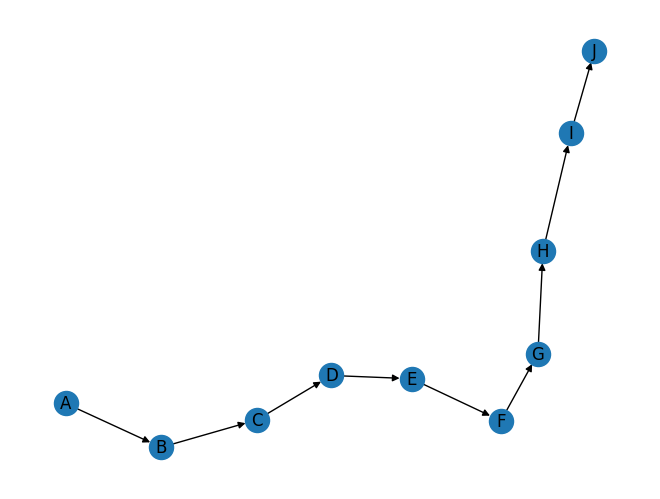

In [107]:
nx.draw_spring(G,with_labels=True)

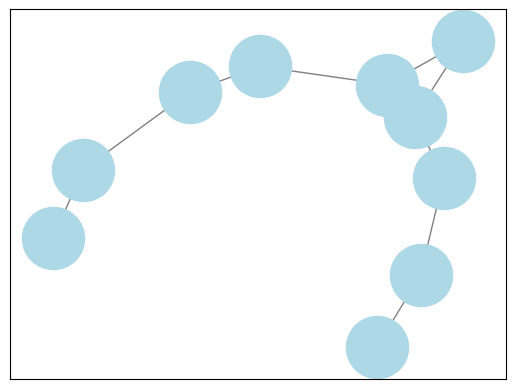

In [112]:
nx.draw_networkx_nodes(G,pos,node_color='lightblue',node_size=2000,label=True)
nx.draw_networkx_edges(G,pos,arrowstyle='-',arrowsize=70,edge_color='gray',label=True)

In [120]:
node_labels = {
    node: f"{node}\nT={attrs['features']['T']:.2f}, I={attrs['features']['I']:.2f},F={attrs['features']['F']:.2f}"for node, attrs in G.nodes(data=True)
}

{'A': Text(0.2643058641319017, -0.9792117793032885, 'A\nT=1.00, I=0.00,F=0.00'),
 'B': Text(0.43511159550412265, -0.6002684523182247, 'B\nT=0.50, I=0.20,F=0.30'),
 'C': Text(0.5249880544208733, -0.09146456842278176, 'C\nT=0.80, I=0.10,F=0.10'),
 'D': Text(0.41232569943454567, 0.23257516415967847, 'D\nT=0.70, I=0.10,F=0.20'),
 'E': Text(0.6006137778255725, 0.6290453330424738, 'E\nT=0.90, I=0.00,F=0.10'),
 'F': Text(0.3026243003048447, 0.4024562551966797, 'F\nT=0.60, I=0.30,F=0.10'),
 'G': Text(-0.19034223694058447, 0.49734514133939506, 'G\nT=0.30, I=0.20,F=0.50'),
 'H': Text(-0.4664592385982751, 0.363398605381435, 'H\nT=0.40, I=0.20,F=0.40'),
 'I': Text(-0.8831678160830004, -0.047371118746278223, 'I\nT=0.20, I=0.20,F=0.60'),
 'J': Text(-1.0, -0.40650458032908937, 'J\nT=0.72, I=0.72,F=0.67')}

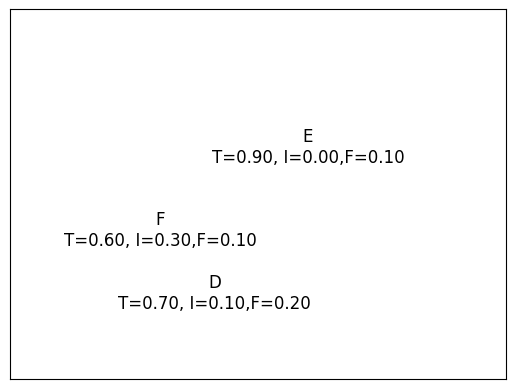

In [121]:
nx.draw_networkx_labels(G,pos,labels=node_labels)

In [130]:
edge_labels = {
    (u, v): f"{attrs['T']}, {attrs['I']}, {attrs['F']}"
    for u, v, attrs in G.edges(data=True)
}


{('A', 'B'): Text(0.3497056961737718, -0.7897468461425325, '0.4, 0.0, 0.0'),
 ('B', 'C'): Text(0.4800496921556784, -0.3458672622094875, '0.3, 0.1, 0.1'),
 ('C', 'D'): Text(0.4686560134474672, 0.07055778141236896, '0.5, 0.1, 0.1'),
 ('D', 'E'): Text(0.5064716578898251, 0.4308142899044347, '0.6, 0.1, 0.0'),
 ('E', 'F'): Text(0.45162233515226435, 0.5157533004407149, '0.5, 0.1, 0.0'),
 ('F', 'G'): Text(0.05614309004830298, 0.44990030206249676, '0.2, 0.2, 0.1'),
 ('G', 'H'): Text(-0.3284057115134604, 0.4303694605579449, '0.3, 0.1, 0.1'),
 ('H', 'I'): Text(-0.6748114983570563, 0.15801574338446214, '0.4, 0.2, 0.0'),
 ('I', 'J'): Text(-0.9415848527708702, -0.2269407535656452, '0.3, 0.3, 0.1')}

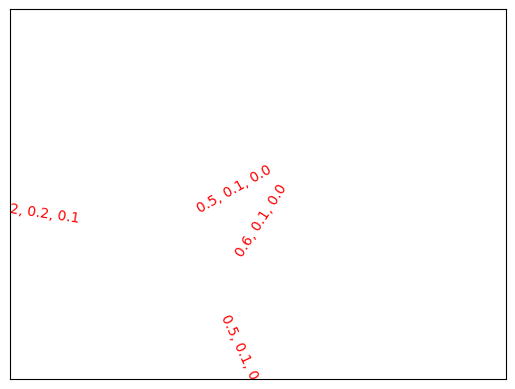

In [131]:
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

Text(0.5, 1.0, 'Updated NGNN')

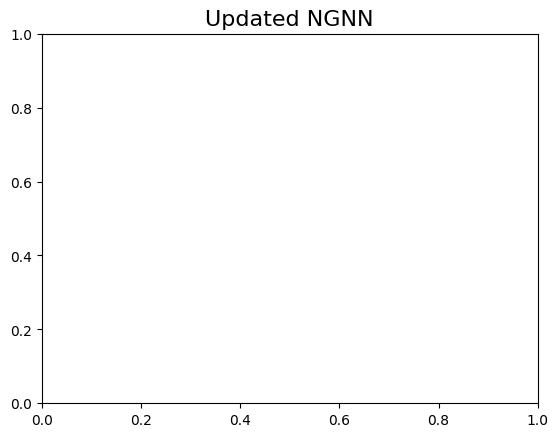

In [133]:
plt.title("Updated NGNN", fontsize=16)


In [134]:
plt.show()

In [139]:
for u, v, attrs in G.edges(data=True):
    print(u,v,attrs)

A B {'T': 0.4, 'I': 0.0, 'F': 0.0}
B C {'T': 0.3, 'I': 0.1, 'F': 0.1}
C D {'T': 0.5, 'I': 0.1, 'F': 0.1}
D E {'T': 0.6, 'I': 0.1, 'F': 0.0}
E F {'T': 0.5, 'I': 0.1, 'F': 0.0}
F G {'T': 0.2, 'I': 0.2, 'F': 0.1}
G H {'T': 0.3, 'I': 0.1, 'F': 0.1}
H I {'T': 0.4, 'I': 0.2, 'F': 0.0}
I J {'T': 0.3, 'I': 0.3, 'F': 0.1}


In [ ]:

edge_labels = {
    (u, v): f"{attrs['T']}, {attrs['I']}, {attrs['F']}"
    for u, v, attrs in G.edges(data=True)
}

In [142]:
for u,v in G.nodes(data=True):
    print(v)


{'features': {'T': 1.0, 'F': 0.0, 'I': 0.0}}
{'features': {'T': 0.5, 'F': 0.3, 'I': 0.2}}
{'features': {'T': 0.8, 'F': 0.1, 'I': 0.1}}
{'features': {'T': 0.7, 'F': 0.2, 'I': 0.1}}
{'features': {'T': 0.9, 'F': 0.1, 'I': 0.0}}
{'features': {'T': 0.6, 'F': 0.1, 'I': 0.3}}
{'features': {'T': 0.3, 'F': 0.5, 'I': 0.2}}
{'features': {'T': 0.4, 'F': 0.4, 'I': 0.2}}
{'features': {'T': 0.2, 'F': 0.6, 'I': 0.2}}
{'features': {'T': np.float64(0.7202407876771153), 'F': np.float64(0.6678967453274235), 'I': np.float64(0.7247581350169942)}}
